# MOD 3 PROJECT

For this project i used wine review data sourced from kaggle https://www.kaggle.com/kabure/wine-review-s-eda-recommend-systems. The intention of this project is to complete statistical and hypothesis testing to generate analytical insights that could be useful to potential stakeholders and other people of interest. 

# <b>STAKEHOLDERS

The indended audience for this analysis is the owners of wineries, people that enjoy drinking and people interested in wines or the wine industry.

# <B> HYPOTHESIS

<b>Hypothesis 1:</b> Europe has higher mean price than the rest of the world
    <br>h0: Europe price mean = World price mean
    <br>ha: Europe price mean > World price mean
    
<b>Hypothesis 2:</b> Europe has higher rated wines
    <br>h0:Europe = World
    <br>ha: Europe > World
    
<b>Hypothsis 3:</b> Most of the top varietys of wines are produced in Europe
    <br>h0: Not in Europe
    <br>ha: in Europe

<br><br>

# CLEANING

<b>Importing necessary packages

In [785]:
#importing necessary packages
import numpy as np
from scipy import stats 
import math
import statsmodels.api as sm 
import pylab as py 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

#importing pandas and the csv files
import pandas as pd
df = pd.read_csv('winemag-data_first150k.csv')

<b>Looking through the dataset

In [786]:
#looking at the shape and the length of the dataframe
df.shape

(150930, 11)

In [841]:
#checking the types of data within the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137230 entries, 0 to 137229
Data columns (total 12 columns):
Unnamed: 0     137230 non-null int64
country        137230 non-null object
description    137230 non-null object
designation    94919 non-null object
points         137230 non-null int64
price          137230 non-null float64
province       137230 non-null object
region_1       114393 non-null object
region_2       60704 non-null object
variety        137230 non-null object
winery         137230 non-null object
continent      137230 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 12.6+ MB


In [787]:
#checking the data
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [788]:
#checking min, max and mean prices and points
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [789]:
#counting the number of countries within the data frame
df.country.value_counts().head()

US        62397
Italy     23478
France    21098
Spain      8268
Chile      5816
Name: country, dtype: int64

In [790]:
#dropping the nan values within country and the price column
df.dropna(subset=['country','price'], inplace=True)

In [791]:
#checking the shape to check if the changes have been made
#about 20,000 rows with nan values have been removes
df.shape

(137230, 11)

In [792]:
#found an outlier within the data
df_US_FRA = df.country =='US-France'

In [793]:
#checking the amount of times this has appeared to check if it was an error
df_US_FRA.value_counts()

False    137229
True          1
Name: country, dtype: int64

In [794]:
#looking at the different types of countries within the country column
df.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [795]:
#creating a function that will check the countries within each of the rows and give the correct continent to it
#and also create a column titled 'continents' which display the correspoinding continent of the country within that row

#creating a list of continents with all the countries listed within the data frame
asia = ['Israel', 'Japan', 'China', 'South Korea']
europe = ['Spain', 'France', 'Italy', 'Bulgaria', 'Portugal','Greece', 'Romania', 'Germany', 
        'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India','Turkey', 'Macedonia', 'Lebanon',
        'Serbia','Switzerland', 'Albania', 'Bosnia and Herzegovina','Cyprus',
        'England','Ukraine','Georgia', 'Montenegro', 'Luxembourg', 'Slovakia', 'Czech Republic']
africa = ['South Africa', 'Morocco', 'Lithuania']
northAmerica = ['US', 'Canada','Mexico']
southAmerica = ['Argentina', 'Chile','Brazil', 'Uruguay']
oceania = ['New Zealand','Australia']
other = ['US-France']

#creating a function to display the corresponding continents
def GetContinent(c):
    if c in asia:
        return "Asia"
    elif c in northAmerica:
        return "North America"
    elif c in southAmerica:
        return "South America"
    elif c in oceania:
        return "Oceania"
    elif c in europe:
        return "Europe"
    elif c in africa:
        return "Africa"
    else:
        return "Other"

df['continent'] = df['country'].apply(lambda x: GetContinent(x))
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery,continent
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,North America
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,Europe
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,North America
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,North America
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,Europe


In [796]:
#checking to see if the previous code had worked
df.continent.unique()

array(['North America', 'Europe', 'Oceania', 'South America', 'Asia',
       'Africa', 'Other'], dtype=object)

In [797]:
#assiging other continents such as US-France as df_other
df_other = df[df['continent']=='Other']

In [798]:
#checking length of df_other
len(df_other)

1

In [799]:
#dropping null values of country and price
df.dropna(subset=['country','price'], inplace=True)
#reseting the index
df.reset_index(drop=True, inplace=True)

In [800]:
#checking the amount of null values in the dataframe
df.isna().sum()

Unnamed: 0         0
country            0
description        0
designation    42311
points             0
price              0
province           0
region_1       22837
region_2       76526
variety            0
winery             0
continent          0
dtype: int64

In [801]:
#grouping the data based on their continents and creating a new data frame, one for each of the continents
dfEurope=df.loc[df['continent']=='Europe']
dfAsia=df.loc[df['continent']=='Asia']
dfAfrica=df.loc[df['continent']=='Africa']
dfNA=df.loc[df['continent']=='North america']

<br><br>

# <b>STATISTICAL TESTING

Testing the data using multiple methods including sample t-tests, Anova, and effect size with cohen's d.

<B><u>CREATING FUNCTIONS FOR EACH OF THE TESTS:

<b>SHAPIRO WILK TEST

The Shapiro–Wilk test, tests normality tests on whether the null hypothesis is using a sample came from a normally distributed population.

In [802]:
#function for Shapiro-Wilk test
def sw_test (data):
    '''Null: Data is normally distributed
    Alternate: Data is not normally distributed.
    If p value < 0.05 then reject null.'''
    if stats.shapiro(data)[1]<.05:
        print('The sample is not normally distributed')
        return stats.shapiro(data)
    else:
        print('The sample is normally distributed')
        return stats.shapiro(data)

<B>WELCH'S T-TEST

Welch's t-test, a two-sample location test which is used to test the hypothesis that two populations have equal means.

In [803]:
#function for Welch's t-test
def welch_t(a,b, equal_var=False,describe = True ):
    #Calculate degrees of freedom
    dof_num = (a.var()/a.size + b.var()/b.size)**2
    dof_den =(a.var()/a.size)**2 / (a.size-1) + (b.var()/b.size)**2 / (b.size-1)
    dof = dof_num/dof_den
    #Perform Welch's t-test
    test, p_val = stats.ttest_ind(a,b, equal_var = equal_var)
    if describe:
        print(f"Welch's t-test = {test}\np-value: {p_val}\nDoF: {dof}")
        #Print decision.
        if p_val<0.05:
            print('Decision: Reject the null hypothesis')
        else:
            print('Decision: Fail to reject the null hypothesis')
    return stats.ttest_ind(a,b, equal_var = False)

<b>ANOVA

ANOVA (Analysis of Variance) is a method for generalizing statistical tests to multiple groups.  

In [804]:
#ANOVA function
def ANOVA(formula,data, decision=True):
    lm = ols(formula,data).fit()
    result = sm.stats.anova_lm(lm, typ=1)
    if decision:
        if result['PR(>F)'][0]>0.05:
            print('Fail to reject the Null Hypothesis')
        else:
            print('Reject the Null Hypothesis')
    return result

<b>COHEN'S D EFFECT SIZE

Cohen's d is an appropriate effect size for the comparison between two means.

In [805]:
#Cohen's d Effect size function
def cohen_d(a,b, describe = True):
    a_n,b_n = len(a),len(b)
    
    pv_num = ((a_n-1)*a.var())+((b_n-1)*b.var())
    pv_den = a_n+b_n
    pooled_sd = np.sqrt(pv_num/pv_den)
    d = (a.mean()-b.mean())/pooled_sd
    if describe:
        print("Cohens'd: ",d)
        if d<0.20:
            print('Effect Size: Very Small')
        elif d<0.50:
            print('Effect Size: Small')
        elif d<0.80:
            print('Effect Size: Medium')
        else:
            print('Effect Size: Large')
    return d


<BR><br>

# <b>HYPOTHESIS 1 (WELCH'S T-TEST)</b>

<b>Hypothesis 1:</b> Europe has higher mean price than the rest of the world
    <br>h0: Europe price mean = World price mean
    <br>ha: Europe price mean > World price mean

In [806]:
#obtaining the mean price of wines within each continent
df.groupby(['continent'])['price'].mean().reset_index()

,continent,price
0,Africa,21.078866
1,Asia,31.113086
2,Europe,36.597164
3,North America,33.652237
4,Oceania,28.527248
5,Other,50.000000
6,South America,20.101021


In [807]:
#assiging prices in europe to a dataframe
dfEurope = df.loc[df.continent == 'Europe']

#assigning prices in the rest of the world to a dataframe
dfWorld = df.loc[df.continent != 'Europe']

In [808]:
#checking the length of the data within dfEurope
len(dfEurope)

52530

In [809]:
#obtaining samples for each
dfEurope = dfEurope.sample(n=200)
dfWorld = dfWorld.sample(n=200)

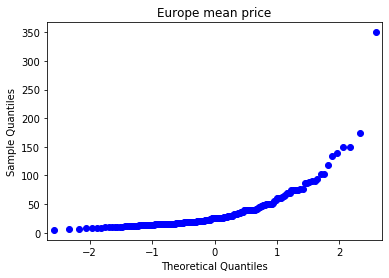

NormaltestResult(statistic=215.63586911237877, pvalue=1.4971522662559224e-47)

In [810]:
#running a qq plot
sm.qqplot(dfEurope.price)
plt.title('Europe mean price')
py.show()

#running a normal test to see if sample differs from a normal distribution
stats.normaltest(dfEurope.price)

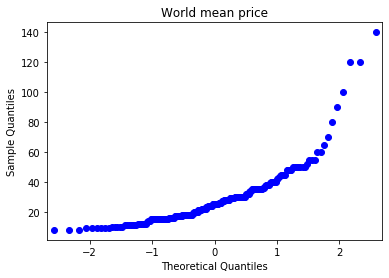

NormaltestResult(statistic=136.25543544383862, pvalue=2.585283227964141e-30)

In [811]:
#running a qq plot
sm.qqplot(dfWorld.price)
plt.title('World mean price')
py.show()

#running a normal test to see if sample differs from a normal distribution
stats.normaltest(dfWorld.price)

For the normaltest resuls from both of the tests it gave a pvalue>0.5 therefore they are not normal distributions.

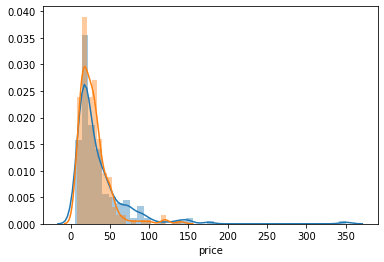

In [812]:
sns.distplot(dfEurope.price)
sns.distplot(dfWorld.price)

In [813]:
#creating a function to help in the creation of the visualization
def plot_compare(Europe,World, title ='Prices of wines within Europe vs the world',
                labelEurope = 'Europe', labelWorld='World'):
    
    sns.distplot(Europe, label=labelEurope, 
             color='blue', hist_kws=dict(alpha=.3))
    sns.distplot(World, label=labelWorld,
            color='orange', hist_kws=dict(alpha=.3))
    
    plt.axvline(dfEurope.price.mean(), 0,1, color='blue', 
            linestyle='--', label='Mean: '+str(round(Europe.mean(),2)))
    plt.axvline(dfWorld.price.mean(), 0,1, color='orange', 
            linestyle='--', label='Mean: '+str(round(World.mean(),2) ))

    plt.title(title)
    plt.ylabel('frequency')
    plt.legend()
    plt.show();
    print(labelEurope+' mean: ',round(Europe.mean()))
    print(labelWorld+' mean: ',round(World.mean()))
    print('Point difference: ',
          round((Europe.mean()-World.mean())/World.mean()*100, 2),'%')
   

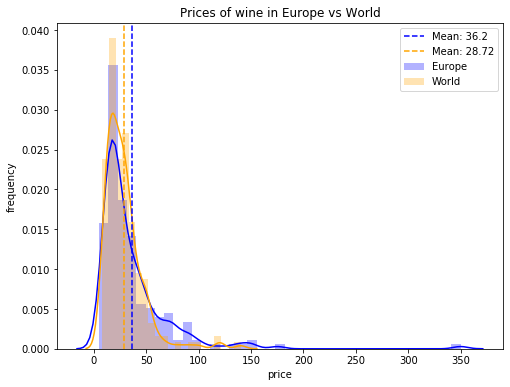

Europe mean:  36
World mean:  29
Point difference:  26.03 %


In [814]:
#graphing the graph comparing wine prices between Europe and the world
fig = plt.figure(figsize=(8,6))
plot_compare(dfEurope.price,dfWorld.price, title ='Prices of wine in Europe vs World',
                labelEurope = 'Europe', labelWorld='World')

Both of the prices from Europe and the world are evidently not normally distributed, with the even bell curve, and instead fall too far to the left. Aside from that this graph it can be seen that there is a much more higher and significant mean in the prices in Europe vs the world. To further check the significance in the results and if the sample came from a normally distributed population a Shapiro–Wilk t-test will be conducted.

In [842]:
#Test both samples for normality
swEuropePrice =  sw_test(dfEurope.price)
swWorldPrice = sw_test(dfWorld.price)

The sample is not normally distributed
The sample is not normally distributed


Both of the data in the dataframe with the prices column have varying prices. Even after altering the original sample size of 200 to around 10-50 the world prices appeared to be not normally distrubuted but the mean prices within europe imporved but still remained not normally distributed.

Following this i went on to check is the samples came from populations that have equal variances with the use of Levene's test

In [816]:
#Perfom Levene test on both samples
if stats.levene(dfEurope.price,dfWorld.price)[1]<0.05:
    print('Input samples are not from populations with equal variances.')
else:
    print('Input samples are from populations with equal variances.')

Input samples are not from populations with equal variances.


From this we can see that the samples do not have equal variances. So therefore a welch's t test will be run to check how significantly different the sample means are. Welch's t-test will be used since the populations do not have equal variances.

In [817]:
#preforming a welch t test
welch1 = welch_t(dfEurope.price,dfWorld.price)

#preforming a cohens d test
d = cohen_d(dfEurope.price,dfWorld.price)

Welch's t-test = 2.568738678249288
p-value: 0.010686059645715994
DoF: 302.76374911349023
Decision: Reject the null hypothesis
Cohens'd:  0.2575184707652354
Effect Size: Small


In conclusion from conducting the Welch's t test, it provided the results where the p-value is less than 0.05 indicats that the null hypothesis is false and that is should be rejected. Therefore we can say that Europe has the most expensive wines compared to the rest of the world.

<br><br>

# <B>HYPOTHESIS 2 (INDEPENDENT T-TEST)

<b>Hypothesis 2:</b> Europe has higher rated wines
    <br>h0:Europe = World
    <br>ha: Europe > World

An independent t-test or two sample test will be conducted to test if there is a statistical significant difference between the two price means.

In [827]:
#obtaining the mean points of wines within each continent
df.groupby(['continent'])['points'].mean().reset_index()

,continent,points
0,Africa,87.206026
1,Asia,87.087237
2,Europe,88.155473
3,North America,87.815373
4,Oceania,87.750879
5,Other,88.000000
6,South America,86.133647


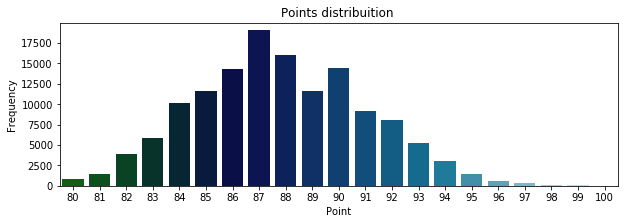

In [828]:
# visualization showing point distribution
plt.figure(figsize=(10,3))

plt.subplot(1,1,1) 
g = sns.countplot(x='points', data=df, palette='ocean') 
g.set_title("Points distribuition ")
g.set_xlabel("Point") 
g.set_ylabel("Frequency") 
plt.show() 

In [829]:
#obtaining sample size from dfEurope and dfWorld
dfEurope = dfEurope.sample(n=200)
dfWorld = dfWorld.sample(n=200)

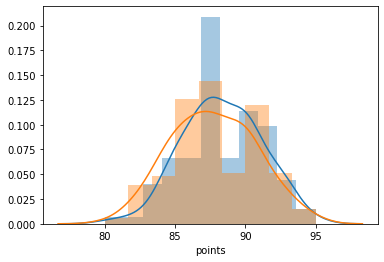

In [830]:
#distribution plots
sns.distplot(dfEurope.points)
sns.distplot(dfWorld.points)

In [831]:
#creating a function to help in the creation of the visualization
def plot_compare(Europe,World, title ='Points of wines within Europe vs the world',
                labelEurope = 'Europe', labelWorld='World'):
    
    sns.distplot(Europe, label=labelEurope, 
             color='blue', hist_kws=dict(alpha=.3))
    sns.distplot(World, label=labelWorld,
            color='orange', hist_kws=dict(alpha=.3))
    
    plt.axvline(dfEurope.points.mean(), 0,1, color='blue', 
            linestyle='--', label='Mean: '+str(round(Europe.mean(),2)))
    plt.axvline(dfWorld.points.mean(), 0,1, color='orange', 
            linestyle='--', label='Mean: '+str(round(World.mean(),2) ))

    plt.title(title)
    plt.ylabel('frequency')
    plt.legend()
    plt.show();
    print(labelEurope+' mean: ',round(Europe.mean()))
    print(labelWorld+' mean: ',round(World.mean()))
    print('Point difference: ',
          round((Europe.mean()-World.mean())/World.mean()*100, 2),'%')
   

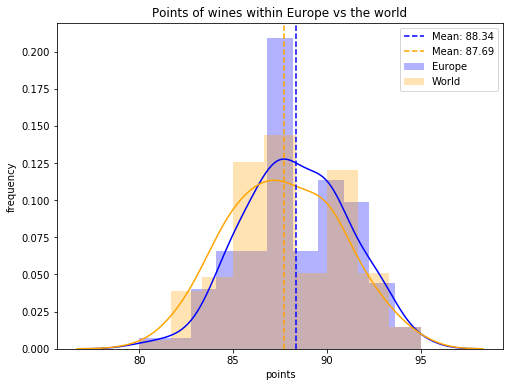

Europe mean:  88
World mean:  88
Point difference:  0.74 %


In [832]:
fig = plt.figure(figsize=(8,6))
plot_compare(dfEurope.points,dfWorld.points, title ='Points of wines within Europe vs the world',
                labelEurope = 'Europe', labelWorld='World')

With the results given from these graphs, there is an evident normal distribution that can be seen, as appose to the previous graph where the prices were compared which did not have a normal distribution. 

In [833]:
#Test both samples for normality
swEuropePoints =  sw_test(dfEurope.points)
swWorldPoints = sw_test(dfWorld.points)

The sample is not normally distributed
The sample is not normally distributed


In [834]:
#Perfom Levene test on both samples
if stats.levene(dfEurope.points,dfWorld.points)[1]<0.05:
    print('Input samples are not from populations with equal variances.')
else:
    print('Input samples are from populations with equal variances.')

Input samples are from populations with equal variances.


Since the input samples are from populations with equal variances, i will be using an independent t test as appose to a welch's t test.

In [866]:
#getting means of europe and world prices
europe=dfEurope.points
world=dfWorld.points

europe.mean()
world.mean()

87.695

In [875]:
#sample variance function
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

#pooled variane function
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)
#two sample t statistic function
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(europe, world)
t_stat

2.2155184796194036

In [874]:
#checks the results
stats.ttest_ind(europe,world)

Ttest_indResult(statistic=2.2155184796194036, pvalue=0.027289810931629667)

In conclusion, we can reject the null hypothesis that Europe does not have the best rated wines

<br><br>

# <B>HYPOTHESIS 3 (ANOVA)

<b>Hypothsis 3:</b> Most of the top varietys of wines are produced in Europe
    <br>h0: Not in Europe
    <br>ha: in Europe

In [836]:
#checking the top varieties of wine
dfTopVariety=df.groupby(['continent','variety'])['points'].sum().reset_index().sort_values(by='points', ascending=False).head(10)
dfTopVariety

,continent,variety,points
738,North America,Pinot Noir,913915
627,North America,Cabernet Sauvignon,810311
646,North America,Chardonnay,713672
449,Europe,Red Blend,430454
780,North America,Syrah,376763
821,North America,Zinfandel,328029
696,North America,Merlot,314579
744,North America,Red Blend,291139
183,Europe,Chardonnay,266620
455,Europe,Riesling,260254


In [837]:
#creating a dataframe with all the points from Europe
dfTopVarietyE = dfTopVariety.loc[dfTopVariety.continent == 'Europe']

#creating a dataframe with all the points from all continents except Europe
dfTopVarietyW = dfTopVariety.loc[dfTopVariety.continent != 'Europe']

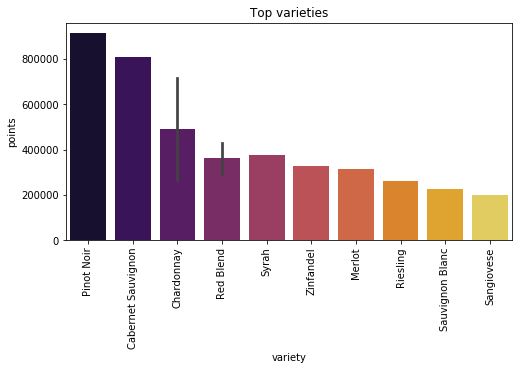

In [838]:
#Top varieties of wine
fig,ax = plt.subplots(1,1,figsize=(8,4))

cnt = df.groupby(['continent','variety'])['points'].sum().reset_index().sort_values(by='points', ascending=False)[:12]
sns.barplot(y = cnt['points'], x = cnt['variety'], palette= 'inferno')
ax.set_title('Top varieties')
ax.set_ylabel('points')
plt.xticks(rotation= 'vertical') 
ax.set_xlabel('variety')

plt.subplots_adjust(wspace=0.3);

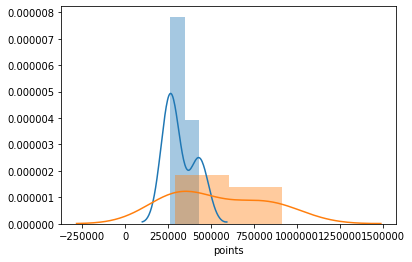

In [839]:
#creating a distribution plot for top varieties in europe
sns.distplot(dfTopVarietyE.points)

#creating a distribution plot for top varieties in the world
sns.distplot(dfTopVarietyW.points)

In [840]:
#running an ANOVA test
formula = 'points ~ C(continent)+variety'
ANOVA(formula,dfTopVariety)

Fail to reject the Null Hypothesis


,df,sum_sq,mean_sq,F,PR(>F)
C(continent),1.0,9.832039e+10,9.832039e+10,1.143838,0.478627
variety,7.0,3.598844e+11,5.141206e+10,0.598117,0.762962
Residual,1.0,8.595656e+10,8.595656e+10,NaN,NaN


In conclusion, since the p values were greater than 0.05 i can accept the null hypothesis and say that the top varieties of wine are not produced in Europe despite Europe having the most expensive wines, and the highest mean in points as conducted from the previous two tests. Instead of Europe other places like North America with 7 out of 10 top rated wines coming from  there.

<br><br>

# <B>FUTURE WORK

<b>For future work:</b>
<br>
1. Review and further look into the point system, and the methods used to obtain such points for each of the wine varieties.

2. Look into why certain wine varieties earn better ratings in some countries but not in others.
